## Image Classfiication with CIFAR1O Dataset 

### Import Libraries

In [3]:
# Installing other Libraries 
import os
import time 
import numpy as np
import torch

In [4]:
# Test Pytorch Installation 
x = torch.rand(3, 3)
print(x)

tensor([[0.0186, 0.0685, 0.8267],
        [0.0834, 0.7153, 0.3568],
        [0.1206, 0.2269, 0.4139]])


In [7]:
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Load Meta data

In [8]:
batches_meta = 'cifar-10-batches-py/batches.meta'

In [9]:
# Get Meta Data
meta_data = unpickle(batches_meta)

In [12]:
for key, value in zip(meta_data.keys(), meta_data.values()):
    print(f"{key}, {value} \n")

b'num_cases_per_batch', 10000 

b'label_names', [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'] 

b'num_vis', 3072 



### Load Data Batches 

In [13]:
# An array to hold the batches 

data_batches: list = []

In [14]:
batch_1 = 'cifar-10-batches-py/data_batch_1'
data_batch_1: dict = unpickle(batch_1)
data_batches.append(data_batch_1)

In [15]:
# Get Key and Values
for key, value in zip(data_batch_1.keys(), data_batch_1.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'training batch 1 of 5' 

b'labels', [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 

In [16]:
batch_2 = 'cifar-10-batches-py/data_batch_2'
data_batch_2: dict = unpickle(batch_2)
data_batches.append(data_batch_2)

In [17]:
# Get Key and Values
for key, value in zip(data_batch_2.keys(), data_batch_2.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'training batch 2 of 5' 

b'labels', [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6, 0, 3, 1, 4, 0, 6, 6, 2, 7, 6, 9, 0, 4, 5, 7, 1, 6, 7, 9, 1, 7, 7, 8, 0, 3, 7, 4, 7, 3, 1, 0, 4, 6, 6, 1, 4, 9, 2, 6, 4, 5, 0, 4, 6, 0, 8, 3, 4, 8, 8, 3, 9, 5, 7, 1, 9, 4, 7, 9, 1, 9, 7, 5, 2, 7, 3, 4, 8, 8, 2, 1, 5, 9, 2, 7, 8, 8, 6, 8, 8, 1, 3, 8, 8, 5, 4, 7, 1, 6, 6, 1, 6, 1, 6, 7, 0, 4, 6, 9, 5, 8, 7, 1, 9, 0, 3, 3, 7, 6, 9, 0, 4, 7, 1, 4, 3, 4, 3, 9, 8, 7, 0, 8, 3, 9, 1, 0, 8, 0, 9, 4, 0, 2, 1, 4, 2, 7, 1, 7, 0, 2, 9, 7, 9, 8, 6, 4, 4, 1, 1, 7, 8, 8, 6, 4, 5, 6, 3, 9, 4, 2, 5, 3, 6, 7, 7, 3, 9, 1, 3, 1, 8, 3, 3, 5, 6, 4, 0, 9, 6, 6, 5, 0, 6, 2, 0, 5, 4, 9, 3, 4, 6, 0, 6, 7, 0, 7, 2, 6, 9, 6, 5, 4, 5, 4, 7, 7, 6, 8, 1, 5, 9, 7, 8, 8, 7, 1, 4, 6, 4, 2, 2, 5, 0, 3, 8, 9, 4, 1, 1, 4, 1, 9, 6, 3, 3, 6, 9, 5, 7, 6, 9, 4, 2, 4, 0, 0, 0, 8, 7, 5, 1, 8, 6, 7, 0, 1, 7, 7, 8, 2, 7, 4, 8, 8, 9, 8, 9, 8, 2, 8, 9, 1, 3, 5, 7, 4, 0, 1, 4, 4, 0, 8, 4, 3, 7, 9, 7, 7, 9, 3, 6, 9, 8, 1, 

In [18]:
batch_3 = 'cifar-10-batches-py/data_batch_3'
data_batch_3: dict = unpickle(batch_3)
data_batches.append(data_batch_3)

In [19]:
# Get Key and Values
for key, value in zip(data_batch_3.keys(), data_batch_3.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'training batch 3 of 5' 

b'labels', [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2, 5, 6, 6, 0, 9, 6, 8, 6, 7, 2, 7, 5, 3, 3, 3, 0, 6, 5, 2, 0, 8, 8, 1, 5, 4, 0, 4, 1, 2, 4, 3, 2, 8, 5, 4, 2, 1, 1, 3, 5, 4, 2, 7, 7, 8, 2, 5, 3, 9, 9, 0, 6, 7, 2, 1, 5, 5, 2, 7, 1, 3, 8, 8, 5, 5, 4, 0, 5, 1, 8, 5, 3, 5, 6, 7, 9, 4, 0, 6, 7, 8, 5, 2, 4, 6, 0, 6, 1, 4, 7, 8, 3, 2, 6, 1, 6, 4, 3, 8, 1, 4, 3, 5, 4, 0, 2, 5, 0, 8, 9, 2, 3, 0, 4, 9, 6, 4, 4, 2, 3, 5, 6, 4, 3, 3, 2, 6, 4, 6, 2, 8, 3, 3, 3, 4, 1, 5, 4, 7, 3, 6, 8, 1, 3, 5, 9, 7, 9, 1, 0, 7, 5, 9, 4, 3, 7, 9, 6, 5, 7, 0, 9, 8, 2, 3, 5, 7, 9, 0, 2, 0, 7, 4, 6, 3, 1, 3, 1, 8, 1, 5, 5, 7, 3, 3, 0, 4, 5, 3, 8, 3, 9, 2, 9, 1, 3, 2, 0, 7, 8, 2, 8, 1, 7, 9, 6, 2, 8, 8, 9, 7, 9, 9, 0, 3, 7, 0, 8, 6, 8, 6, 9, 0, 4, 1, 1, 8, 7, 9, 7, 9, 7, 3, 4, 6, 3, 0, 0, 6, 8, 2, 3, 0, 6, 9, 0, 2, 0, 6, 3, 4, 3, 2, 1, 4, 0, 4, 5, 6, 5, 4, 3, 4, 2, 2, 2, 2, 0, 8, 3, 8, 7, 5, 6, 4, 0, 9, 6, 8, 7, 8, 3, 0, 4, 1, 9, 4, 1, 2, 7, 6, 1, 1, 1, 7, 

In [20]:
batch_4= 'cifar-10-batches-py/data_batch_4'
data_batch_4: dict = unpickle(batch_4)
data_batches.append(data_batch_4)

In [21]:
# Get Key and Values
for key, value in zip(data_batch_4.keys(), data_batch_4.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'training batch 4 of 5' 

b'labels', [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1, 4, 2, 3, 2, 1, 2, 8, 9, 5, 0, 7, 6, 7, 6, 8, 8, 7, 4, 9, 1, 2, 6, 5, 9, 4, 2, 5, 1, 0, 1, 1, 9, 0, 7, 5, 3, 9, 6, 3, 3, 3, 4, 1, 5, 9, 7, 7, 2, 9, 0, 2, 8, 5, 9, 6, 7, 8, 4, 0, 4, 9, 2, 7, 1, 0, 5, 1, 8, 1, 6, 5, 9, 7, 0, 4, 5, 2, 3, 5, 5, 6, 0, 2, 1, 1, 5, 8, 5, 2, 4, 2, 2, 5, 3, 0, 3, 0, 2, 9, 1, 1, 7, 3, 8, 5, 4, 5, 9, 6, 5, 6, 4, 4, 5, 5, 1, 1, 5, 6, 2, 5, 0, 8, 6, 2, 2, 6, 8, 8, 6, 7, 4, 0, 4, 1, 5, 4, 2, 0, 3, 0, 9, 5, 7, 8, 1, 1, 7, 8, 8, 3, 0, 0, 4, 7, 9, 6, 0, 9, 9, 9, 2, 1, 1, 7, 4, 3, 7, 5, 5, 7, 9, 3, 6, 9, 7, 5, 7, 1, 7, 0, 5, 6, 7, 3, 0, 4, 5, 1, 1, 8, 8, 6, 3, 2, 9, 7, 8, 1, 3, 9, 8, 6, 9, 2, 4, 4, 1, 4, 2, 4, 5, 2, 0, 1, 5, 1, 2, 1, 2, 0, 2, 4, 4, 1, 1, 2, 9, 5, 6, 4, 2, 8, 7, 2, 7, 4, 0, 2, 6, 5, 8, 8, 9, 7, 7, 3, 0, 4, 1, 3, 0, 0, 8, 7, 5, 9, 8, 7, 5, 0, 1, 4, 5, 6, 9, 2, 2, 3, 4, 5, 4, 6, 1, 8, 0, 7, 0, 7, 8, 4, 5, 6, 8, 0, 3, 4, 4, 5, 9, 5, 3, 2, 1, 1, 

In [22]:
batch_5 = 'cifar-10-batches-py/data_batch_5'
data_batch_5: dict = unpickle(batch_5)
data_batches.append(data_batch_5)

In [23]:
# Get Key and Values
for key, value in zip(data_batch_5.keys(), data_batch_5.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'training batch 5 of 5' 

b'labels', [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8, 2, 7, 0, 4, 1, 7, 7, 4, 4, 9, 9, 6, 2, 4, 1, 6, 4, 9, 6, 6, 9, 6, 9, 9, 5, 7, 1, 6, 8, 2, 9, 5, 9, 5, 3, 7, 1, 3, 3, 9, 1, 7, 8, 9, 7, 4, 3, 4, 9, 5, 8, 4, 9, 3, 6, 1, 1, 4, 3, 9, 9, 1, 9, 9, 2, 4, 3, 2, 4, 7, 1, 5, 1, 8, 6, 3, 6, 3, 4, 4, 9, 9, 9, 7, 0, 5, 7, 7, 4, 8, 8, 4, 2, 0, 5, 2, 4, 9, 1, 7, 7, 4, 8, 8, 8, 0, 2, 3, 6, 3, 9, 0, 8, 2, 2, 4, 8, 8, 1, 8, 5, 7, 6, 0, 9, 1, 4, 8, 2, 1, 0, 5, 1, 6, 5, 3, 4, 9, 9, 0, 3, 5, 4, 2, 6, 3, 9, 4, 9, 8, 6, 4, 1, 1, 9, 8, 2, 2, 1, 8, 5, 9, 7, 8, 1, 1, 4, 2, 4, 2, 0, 8, 8, 0, 0, 4, 3, 0, 7, 7, 6, 1, 6, 7, 1, 5, 6, 1, 7, 2, 4, 0, 2, 2, 5, 9, 3, 2, 1, 4, 1, 2, 9, 8, 5, 2, 3, 3, 4, 9, 7, 2, 3, 9, 7, 6, 2, 9, 7, 5, 4, 0, 8, 7, 2, 0, 3, 5, 1, 3, 1, 7, 8, 7, 9, 8, 2, 9, 1, 4, 8, 6, 7, 3, 6, 9, 7, 9, 4, 5, 8, 0, 5, 6, 6, 0, 8, 4, 6, 1, 4, 2, 2, 1, 8, 4, 4, 0, 2, 4, 1, 9, 8, 9, 0, 7, 1, 1, 6, 4, 7, 4, 6, 9, 3, 2, 7, 3, 7, 4, 5, 1, 9, 6, 3, 

### Load test batch

In [24]:
test_batch = 'cifar-10-batches-py/test_batch'
test_batch: dict = unpickle(test_batch)

In [25]:
# Get Key and Values
for key, value in zip(test_batch.keys(), test_batch.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'testing batch 1 of 1' 

b'labels', [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0

### Plot Images from the dataset

In [26]:
import numpy as np
import matplotlib.pyplot as plt

### Load and Visualize First Data Batch

In [27]:
images = data_batches[0][b'data']
labels = data_batches[0][b'labels']

In [28]:
print(f"Dtype of Images: {type(images)}\nDtype of Lables: {type(labels)} \n")
print(f"Length of Images: {len(images)}\nLenght of Lables: {len(labels)} \n")
print(f"Shape of Images: {np.shape(images)}\nShape of Lables: {np.shape(labels)} \n")

Dtype of Images: <class 'numpy.ndarray'>
Dtype of Lables: <class 'list'> 

Length of Images: 10000
Lenght of Lables: 10000 

Shape of Images: (10000, 3072)
Shape of Lables: (10000,) 



In [29]:
# Reshape each image to 32x32x3
images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [30]:
# Check shape of Image
print(f"New Shape of Image: {np.shape(images)}")

New Shape of Image: (10000, 32, 32, 3)


In [31]:
#Get Label Names
label_names = meta_data[b'label_names']

### Plot the images from first batch

In [32]:
import matplotlib.pyplot as plt

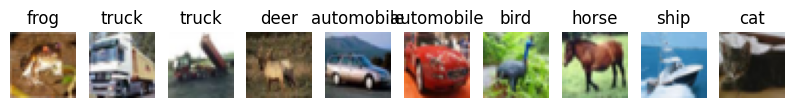

In [33]:
# Plot the first 10 images
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]].decode('utf-8'))  # decode bytes to string
    plt.axis('off')  # Turn off axis
plt.show()

### Merge Batches 

In [34]:
all_data = []
all_labels = []

# Loop through each batch in the data_batches list and append the data and labels
for batch in data_batches:
    all_data.append(batch[b'data'])
    all_labels.append(batch[b'labels'])

In [35]:
# Concatenate all the data (image arrays) and labels into single numpy arrays
merged_data = np.concatenate(all_data, axis=0)
merged_labels = np.concatenate(all_labels, axis=0)

### Reshape Merged Data

In [36]:
# Reshape the merged data to (50000, 32, 32, 3) for image visualization
merged_data = merged_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

### Plot first 100

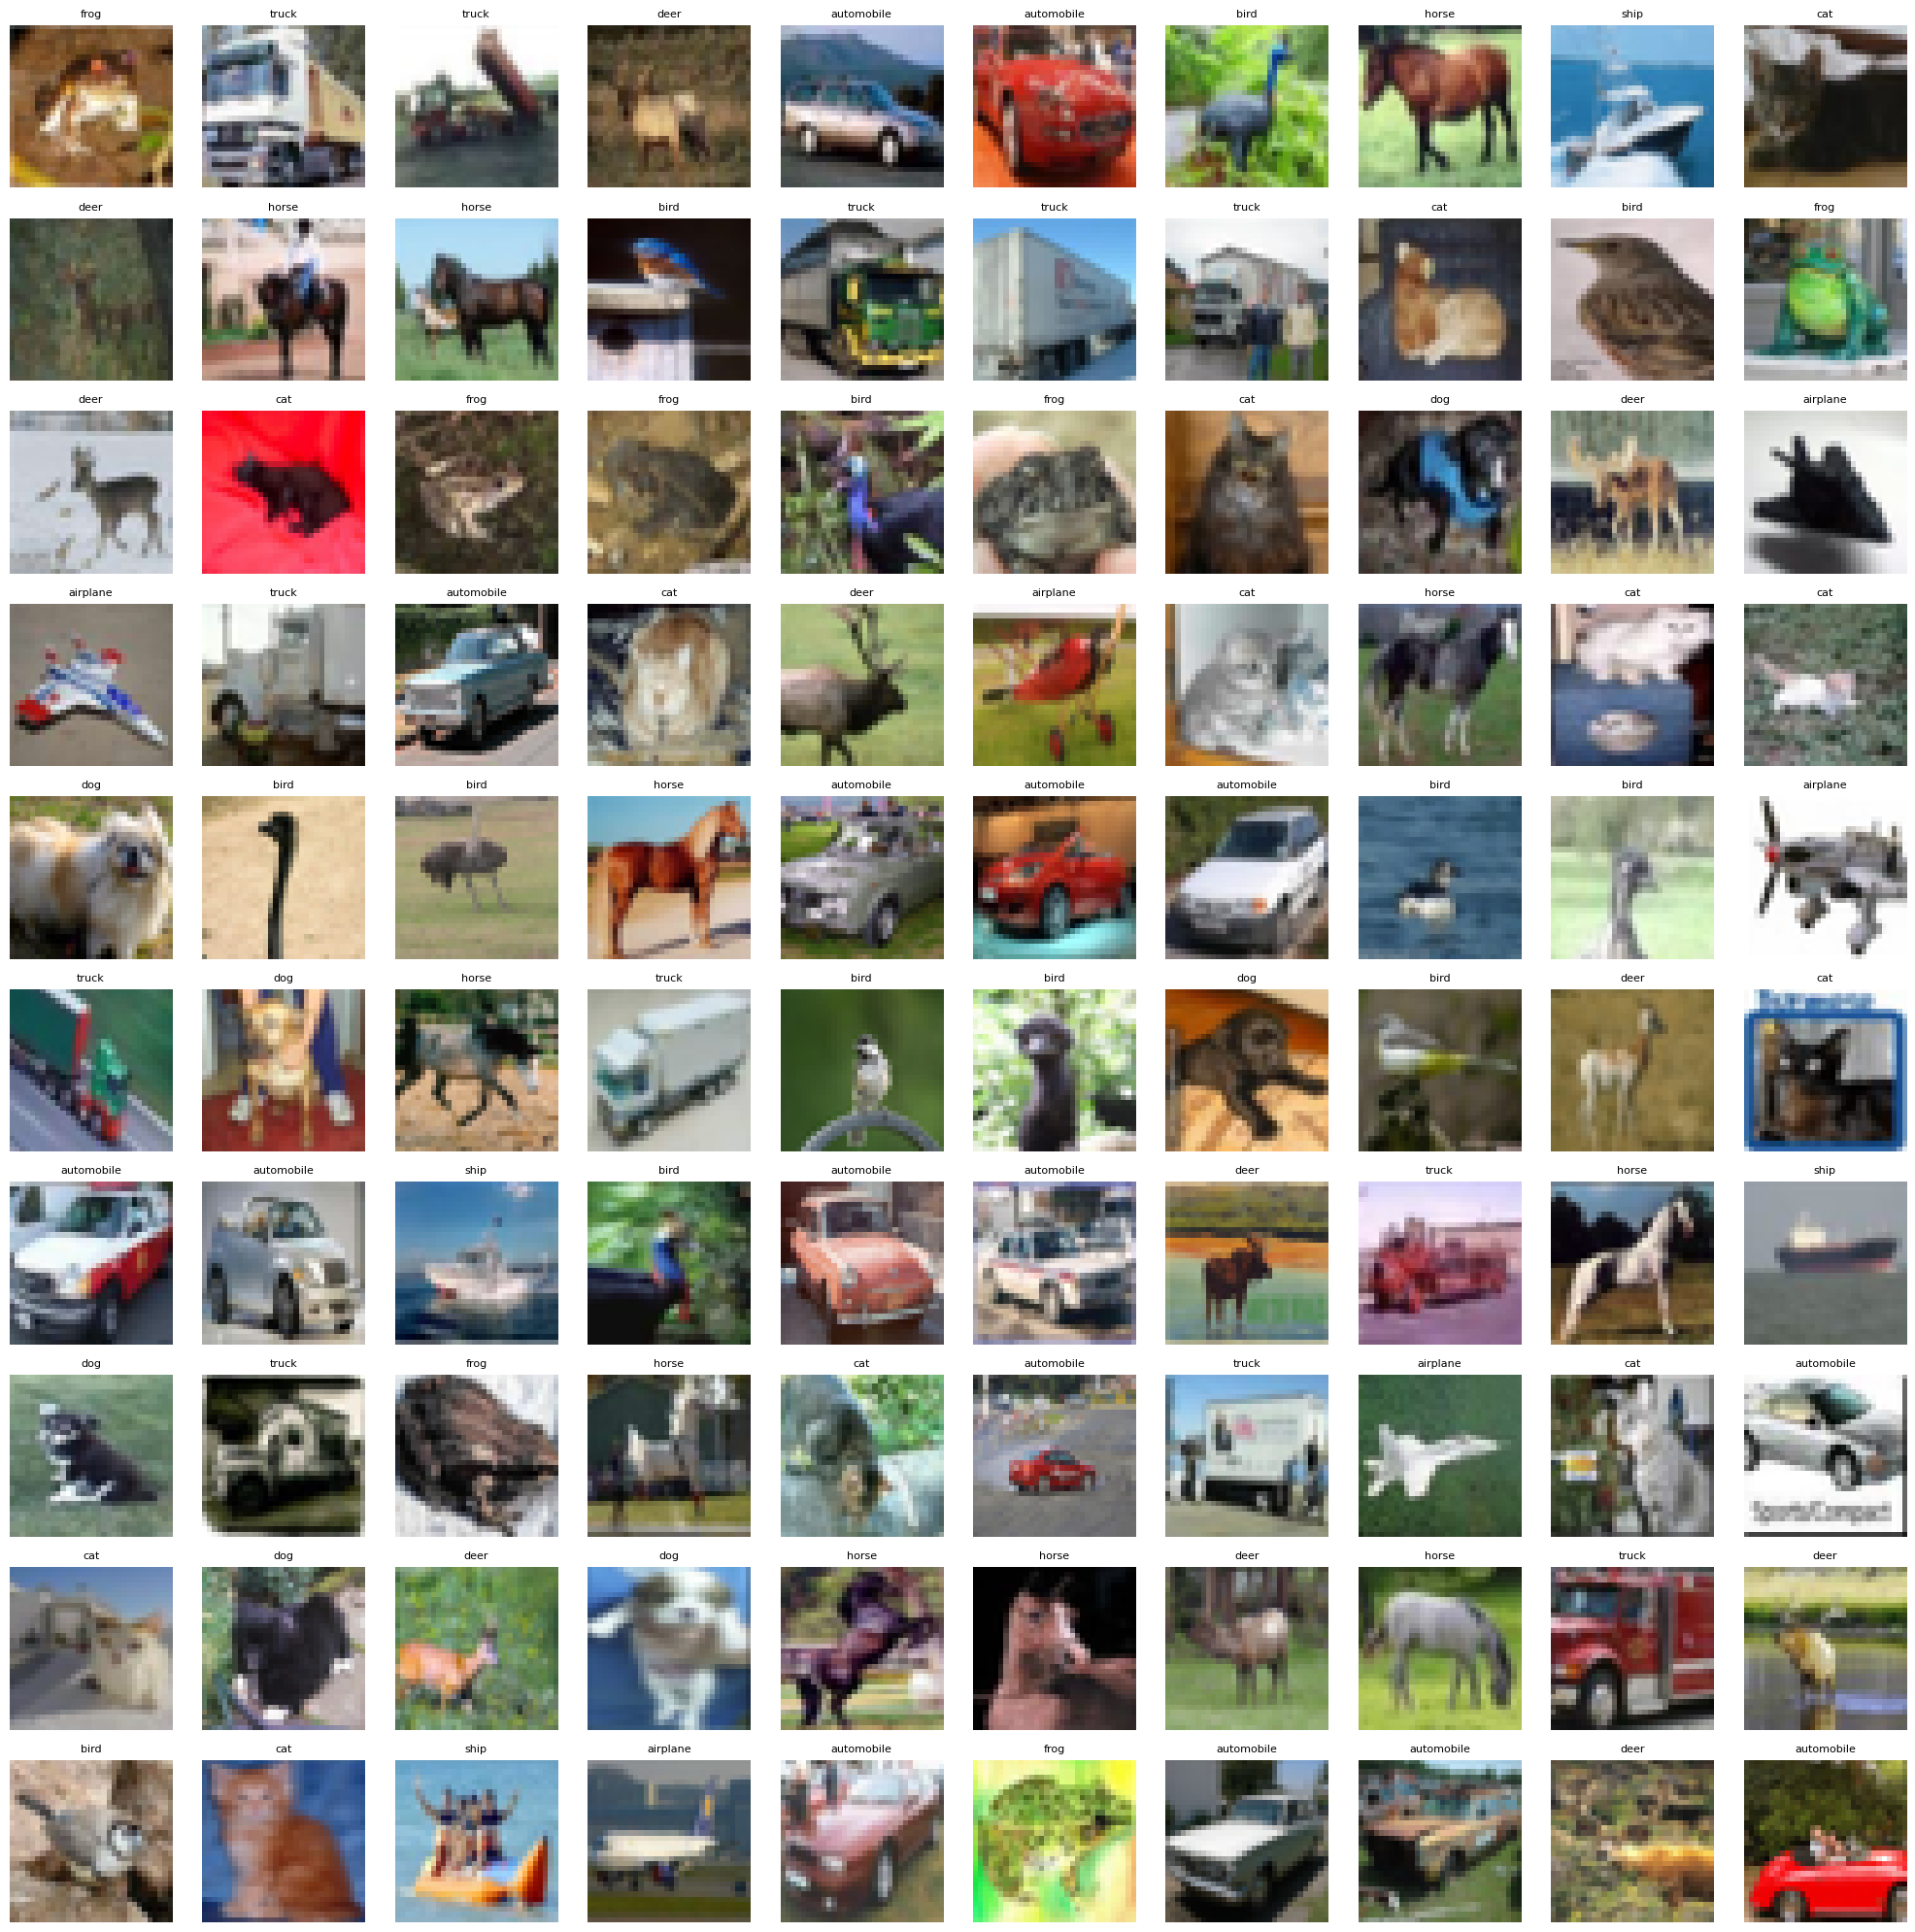

In [37]:
# Number of images to display
num_images = 100
num_cols = 10  # 10 images per row
num_rows = num_images // num_cols  # Number of rows

# Set up the plot grid
plt.figure(figsize=(20, 20))  # Adjust figure size for better visibility

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(merged_data[i])
    plt.title(label_names[merged_labels[i]].decode('utf-8'), fontsize=8)  # Decode label to string
    plt.axis('off')  # Hide axis

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [38]:
print(f"Length of merged images: {len(merged_data)} \nLength of labels: {len(merged_labels)}")

Length of merged images: 50000 
Length of labels: 50000


In [39]:
print(f"Shape of merged images: {np.shape(merged_data)}\nShape of labels: {np.shape(merged_labels)}")

Shape of merged images: (50000, 32, 32, 3)
Shape of labels: (50000,)


In [40]:
print(f"Dtype of merged images: {type(merged_data)}\nDtype of labels: {type(merged_labels)}")

Dtype of merged images: <class 'numpy.ndarray'>
Dtype of labels: <class 'numpy.ndarray'>


### Split Data Set

In [41]:
# # Install Scikit
# %pip install scikit-learn

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(merged_data, merged_labels, test_size=0.2, random_state=42)

In [44]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (40000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


### PreProcess Data

### Normalize Image

In [45]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [46]:
# Check if there are any NaN values in the merged_data
np.isnan(merged_data).any()

False

In [47]:
# Check if all values in merged_data are between 0 and 1
all_in_range = np.all((merged_data >= 0) & (merged_data <= 1))
print(f"All values between 0 and 1: {all_in_range}")


All values between 0 and 1: False


In [48]:
# Re-normalize image
# Normalize merged_data to be in the range [0, 1]
merged_data = merged_data.astype('float32') / 255.0

In [49]:
# Check again if all values are between 0 and 1
all_in_range = np.all((merged_data >= 0) & (merged_data <= 1))
print(f"All values between 0 and 1 after normalization: {all_in_range}")

All values between 0 and 1 after normalization: True


### Build Model

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import torch.nn.functional as F  # Import the functional API

In [51]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [52]:
model = CNNModel()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss combines softmax and cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [53]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Get Model Summary

In [54]:
# # Install torch summaary
# %pip install torchsummary

In [55]:
from torchsummary import summary

In [56]:
# Get Model Summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]          73,856
       BatchNorm2d-5          [-1, 128, 16, 16]             256
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
       BatchNorm2d-8            [-1, 256, 8, 8]             512
         MaxPool2d-9            [-1, 256, 4, 4]               0
           Linear-10                 [-1, 1024]       4,195,328
          Dropout-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
          Dropout-13                  [-1, 512]               0
           Linear-14                   

### Checks

In [57]:
# Check the shape of the input data
for inputs, _ in train_loader:
    print(inputs.shape)
    break

torch.Size([64, 3, 32, 32])


In [58]:
# Convert the input data to the correct format
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2)

In [59]:
from torch.utils.data import DataLoader, TensorDataset

# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train the model

In [61]:
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Remove torch.argmax
    accuracy = 100 * correct / total
    return accuracy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 100

best_accuracy = 0
patience = 10
no_improve = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Remove torch.argmax
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    # Evaluation
    accuracy = evaluate_model(model, test_loader)
    print(f"Accuracy: {accuracy:.2f}%")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        no_improve += 1
    
    if no_improve == patience:
        print("Early stopping")
        break
    
    scheduler.step()

Epoch [1/100], Loss: 1.5709
Accuracy: 52.02%
Epoch [2/100], Loss: 1.1973
Accuracy: 61.57%
Epoch [3/100], Loss: 1.0261
Accuracy: 60.29%
Epoch [4/100], Loss: 0.8965
Accuracy: 69.61%
Epoch [5/100], Loss: 0.8069
Accuracy: 72.49%
Epoch [6/100], Loss: 0.7316
Accuracy: 69.20%
Epoch [7/100], Loss: 0.6535
Accuracy: 74.98%
Epoch [8/100], Loss: 0.5900
Accuracy: 75.08%
Epoch [9/100], Loss: 0.5267
Accuracy: 75.23%
Epoch [10/100], Loss: 0.4705
Accuracy: 78.32%
Epoch [11/100], Loss: 0.4131
Accuracy: 79.05%
Epoch [12/100], Loss: 0.3721
Accuracy: 79.70%
Epoch [13/100], Loss: 0.3347
Accuracy: 77.86%
Epoch [14/100], Loss: 0.3044
Accuracy: 78.84%
Epoch [15/100], Loss: 0.2730
Accuracy: 78.25%
Epoch [16/100], Loss: 0.2436
Accuracy: 77.73%
Epoch [17/100], Loss: 0.2258
Accuracy: 79.41%
Epoch [18/100], Loss: 0.2085
Accuracy: 79.76%
Epoch [19/100], Loss: 0.1954
Accuracy: 78.66%
Epoch [20/100], Loss: 0.1830
Accuracy: 79.95%
Epoch [21/100], Loss: 0.1699
Accuracy: 74.94%
Epoch [22/100], Loss: 0.1603
Accuracy: 78.7

### Evaluate the model

In [63]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Remove torch.argmax

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 82.08%


### Prepare Test Data

In [64]:
# Get Key and Values
for key, value in zip(test_batch.keys(), test_batch.values()):
    print(f"{key}, {value} \n")

b'batch_label', b'testing batch 1 of 1' 

b'labels', [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0

In [65]:
### Get Test Data
test_images = test_batch[b'data']
test_labels = test_batch[b'labels']

In [66]:
# Reshape the test images for image visualization
test_images = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

### Plot Test Images

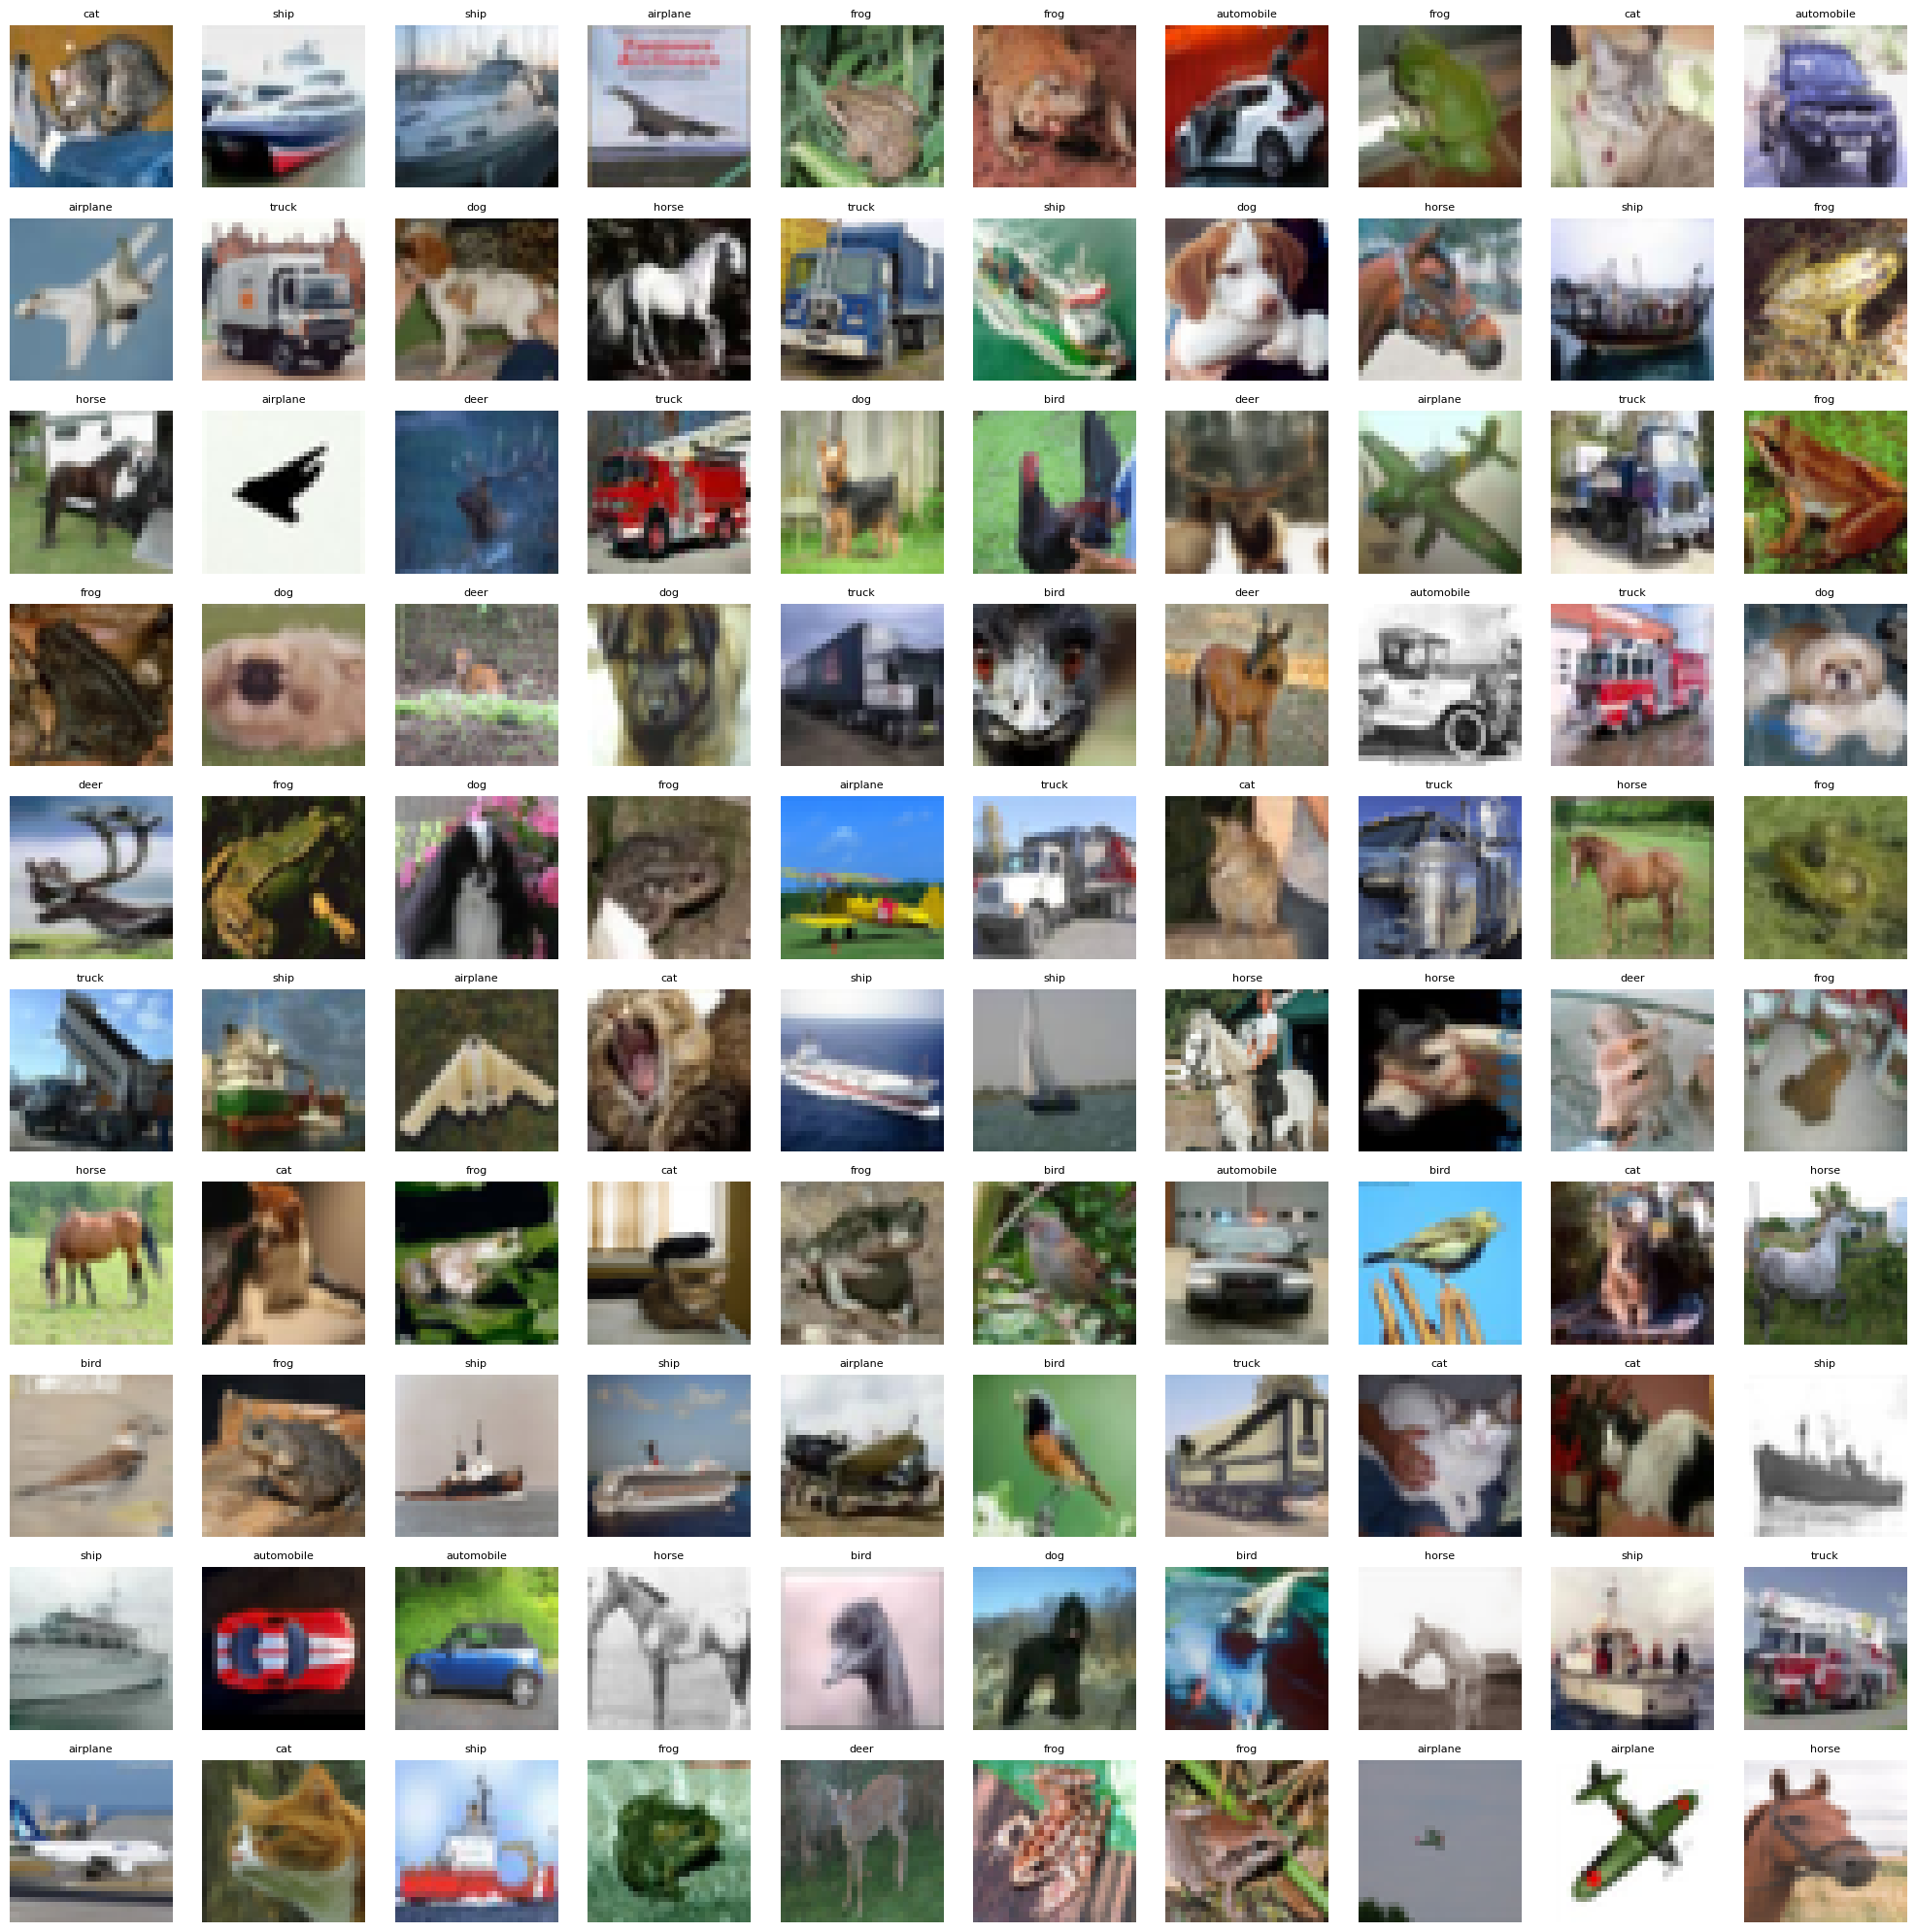

In [67]:
# Number of images to display
num_images = 100
num_cols = 10  # 10 images per row
num_rows = num_images // num_cols  # Number of rows

# Set up the plot grid
plt.figure(figsize=(20, 20))  # Adjust figure size for better visibility

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i])
    plt.title(label_names[test_labels[i]].decode('utf-8'), fontsize=8)  # Decode label to string
    plt.axis('off')  # Hide axis

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### Run Model prediction

In [68]:
# Load the saved model
model = CNNModel()  # Create an instance of the model
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)  # Move the model to the same device you used for training
model.eval()  # Set the model to evaluation mode

/var/folders/4v/bxfts39910v7lnlbgx6zn33m0000gp/T/ipykernel_15974/2232258018.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.

CNNModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [78]:
# Normalize test images
test_images_normalized = test_images.astype('float32') / 255.0

# Create test tensor
test_images_tensor = torch.tensor(test_images_normalized).permute(0, 3, 1, 2)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

# Move to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_images_tensor = test_images_tensor.to(device)

In [79]:
# Make predictions
with torch.no_grad():
    outputs = model(test_images_tensor)
    _, predicted = torch.max(outputs, 1)

# Move predictions to CPU and convert to numpy for comparison
predicted = predicted.cpu().numpy()

# Calculate accuracy
correct = (predicted == test_labels).sum()
total = len(test_labels)
accuracy = 100 * correct / total

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 82.24%


In [80]:
type(predicted)

numpy.ndarray

### Plot Predictions

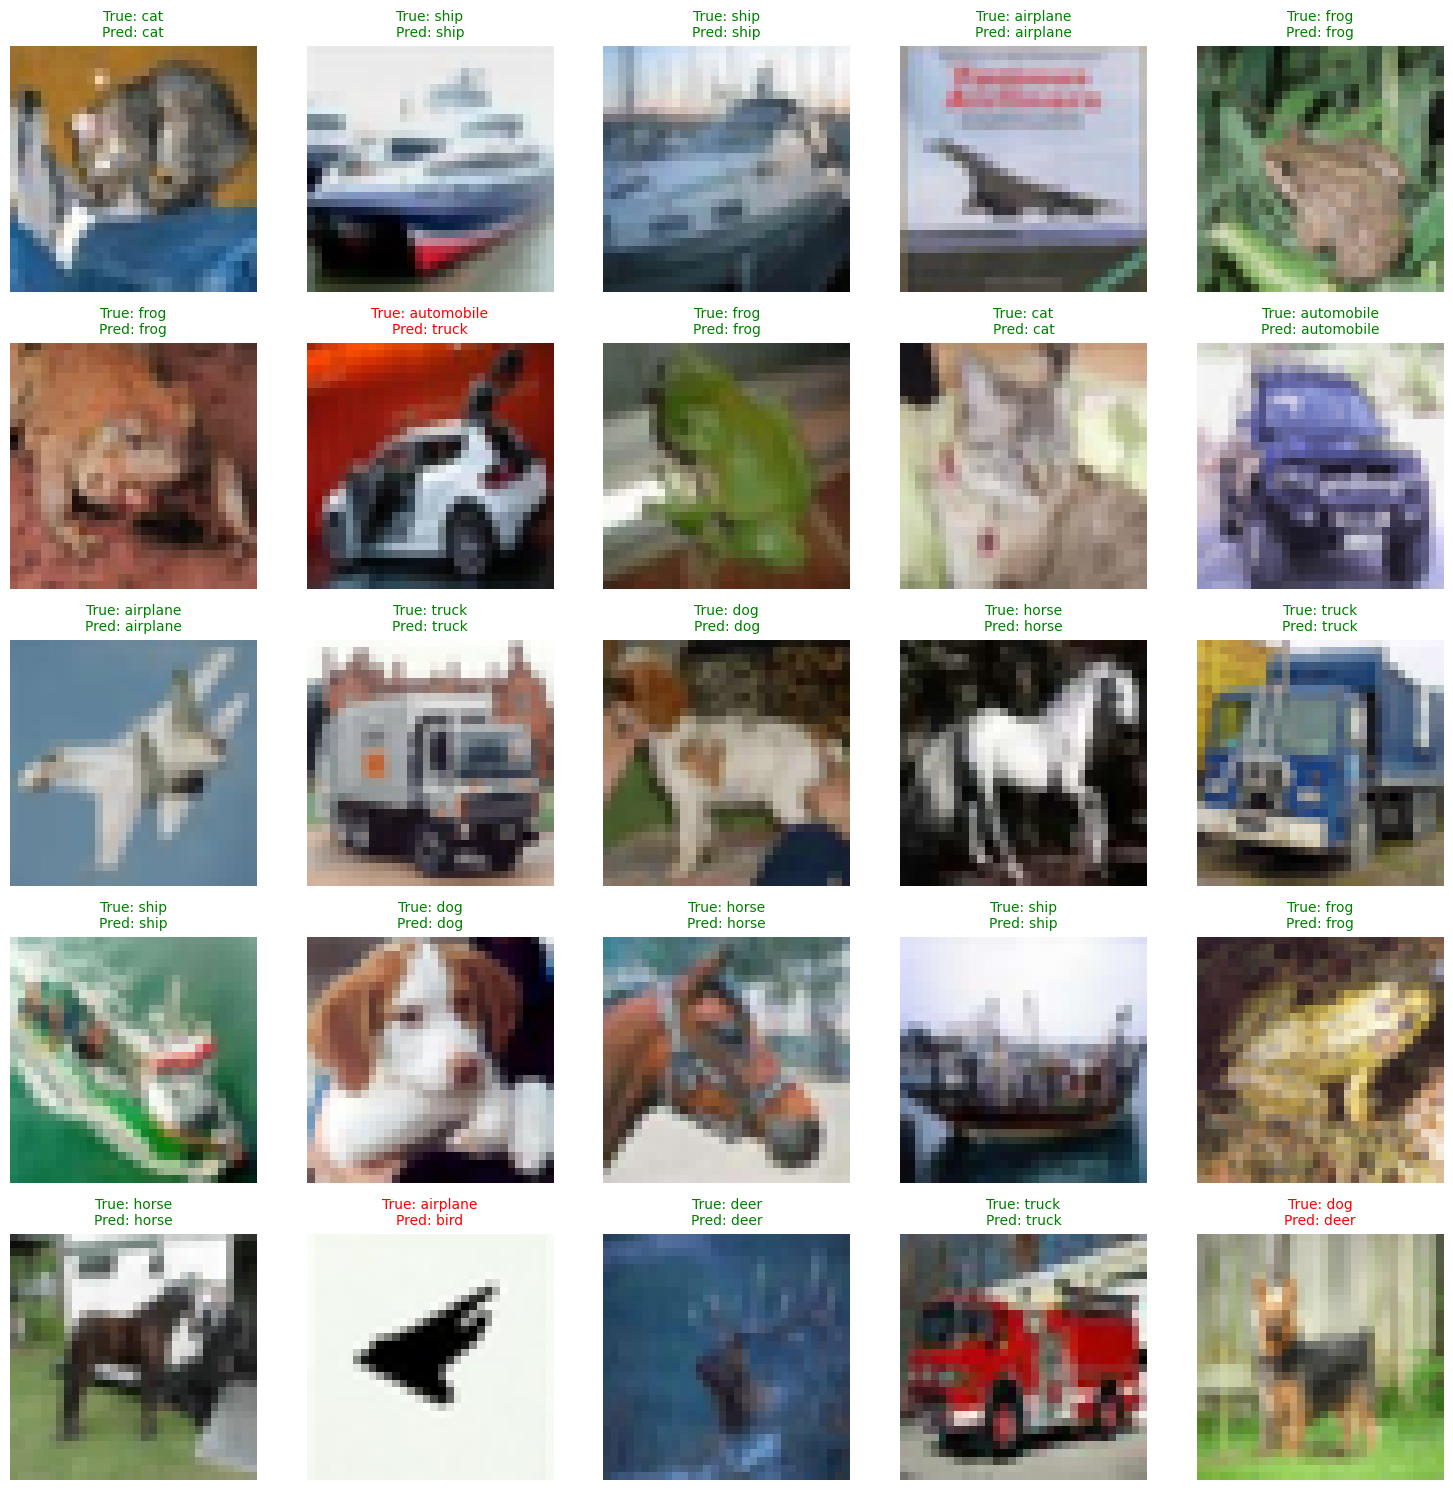

In [81]:
# Number of images to display
num_images = 25
num_cols = 5  # 5 images per row
num_rows = num_images // num_cols

# Set up the plot grid
plt.figure(figsize=(15, 15))  # Adjust figure size for better visibility

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i])
    true_label = label_names[test_labels[i]].decode('utf-8')
    pred_label = label_names[predicted[i]].decode('utf-8')
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
    plt.axis('off')  # Hide axis

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()